# 朴素贝叶斯

## 【关键词】

- 朴素：独立性假设
- 贝叶斯公式

优点：
- 朴素贝叶斯模型发源于古典数学理论，有着坚实的数学基础，以及稳定的分类效率；
- 对小规模的数据表现很好；
- 能处理多分类任务，适合增量式训练；
- 对缺失数据不太敏感，算法也比较简单，常用于文本分类

缺点：
- 只能用于分类问题
- 需要计算先验概率；
- 分类决策存在错误率；
- 对输入数据的表达形式很敏感

In [ ]:
另一个例子，现分别有 A、B 两个容器，在容器 A 里分别有 7 个红球和 3 个白球，
在容器 B 里有 1 个红球和 9 个白球，
现已知从这两个容器里任意抽出了一个球，且是红球，问这个红球是来自容器 A 的概率是多少?
假设已经抽出红球为事件 B，选中容器 A 为事件 A，则有：P(B) = 8/20，P(A) = 1/2，P(B|A) = 7/10，
按照公式，则有：P(A|B) = (7/10)*(1/2) / (8/20) = 0.875

In [ ]:
#选中A容器
P(A) = 1/2

#选中B容器
P(B) = 1/2

#选中红球的概率
P(C) = 8/20

#A容器中选中红球的概率
P(C|A) = 7/10


#B容器中选中红球的概率
P(C|B) = 1/10

#选中了A容器同时是红球概率
P(A)*P(C|A) = 1/2 * 7/10


#选中了B容器同时是红球概率
P(B)*P(C|B) = 1/2 * 1/10


#选中了红球的概率
P(A)*P(C|A) + P(B)*P(C|B) = 8/20



现已知从这两个容器里任意抽出了一个球，且是红球，问这个红球是来自容器 A 的概率是多少?

P(A)*P(C|A) / (8/20)


## 一、朴素贝叶斯原理

朴素贝叶斯算法是一个典型的统计学习方法，主要理论基础就是一个贝叶斯公式，贝叶斯公式的基本定义如下：

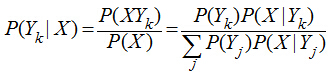

这个公式虽然看上去简单，但它却能总结历史，预知未来：
- 公式的右边是总结历史
- 公式的左边是预知未来

如果把Y看成类别，X看成特征，P(Yk|X)就是在已知特征X的情况下求Yk类别的概率，而对P(Yk|X)的计算又全部转化到类别Yk的特征分布上来。

举个例子，大学的时候，某男生经常去图书室晚自习，发现他喜欢的那个女生也常去那个自习室，心中窃喜，于是每天买点好吃点在那个自习室蹲点等她来，可是人家女生不一定每天都来，眼看天气渐渐炎热，图书馆又不开空调，如果那个女生没有去自修室，该男生也就不去，每次男生鼓足勇气说：“嘿，你明天还来不？”,“啊，不知道，看情况”。

然后该男生每天就把她去自习室与否以及一些其他情况做一下记录，用Y表示该女生是否去自习室，即Y={去，不去}，X是跟去自修室有关联的一系列条件，比如当天上了哪门主课，蹲点统计了一段时间后，该男生打算今天不再蹲点，而是先预测一下她会不会去，现在已经知道了今天上了常微分方法这么主课，于是计算P(Y=去|常微分方程)与P(Y=不去|常微分方程)，看哪个概率大，如果P(Y=去|常微分方程) >P(Y=不去|常微分方程)，那这个男生不管多热都屁颠屁颠去自习室了，否则不就去自习室受罪了。P(Y=去|常微分方程)的计算可以转为计算以前她去的情况下，那天主课是常微分的概率P(常微分方程|Y=去)，注意公式右边的分母对每个类别（去/不去）都是一样的，所以计算的时候忽略掉分母，这样虽然得到的概率值已经不再是0~1之间，但是通过比较大小还是能选择类别。

后来他发现还有一些其他条件可以挖，比如当天星期几、当天的天气，以及上一次与她在自修室的气氛，统计了一段时间后，该男子一计算，发现不好算了，因为总结历史的公式：

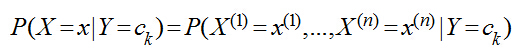

这里n=3，x(1)表示主课，x(2)表示天气，x(3)表示星期几，x(4)表示气氛，Y仍然是{去，不去}，现在主课有8门，天气有晴、雨、阴三种、气氛有A+,A,B+,B，C五种，那么总共需要估计的参数有8×3×7×5×2=1680个，每天只能收集到一条数据，那么等凑齐1680条数据，大学都毕业了，男生大呼不妙，于是做了一个独立性假设，假设这些影响她去自习室的原因是独立互不相关的，于是：

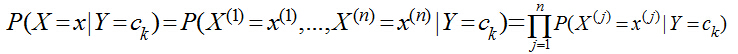

有了这个独立假设后，需要估计的参数就变为，(8+3+7+5)×2 = 46个了，而且每天收集的一条数据，可以提供4个参数，这样该男生就预测越来越准了。


朴素的概念：独立性假设，假设各个特征之间是独立不相关的。

### 朴素贝叶斯分类器

讲了上面的小故事，我们来朴素贝叶斯分类器的表示形式：

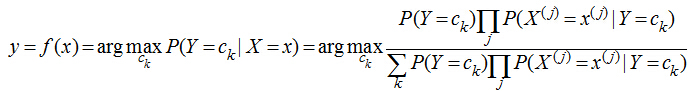

当特征为为x时，计算所有类别的条件概率，选取条件概率最大的类别作为待分类的类别。由于上公式的分母对每个类别都是一样的，因此计算时可以不考虑分母，即

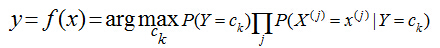

朴素贝叶斯的朴素体现在其对各个条件的独立性假设上，加上独立假设后，大大减少了参数假设空间。

### 在文本分类上的应用

文本分类的应用很多，比如垃圾邮件和垃圾短信的过滤就是一个2分类问题，新闻分类、文本情感分析等都可以看成是文本分类问题，分类问题由两步组成：训练和预测，要建立一个分类模型，至少需要有一个训练数据集。贝叶斯模型可以很自然地应用到文本分类上：现在有一篇文档d（Document），判断它属于哪个类别ck，只需要计算文档d属于哪一个类别的概率最大：

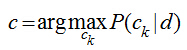

在分类问题中，我们并不是把所有的特征都用上，对一篇文档d，我们只用其中的部分特征词项t1,t2,...,tnd（nd表示d中的总词条数目），因为很多词项对分类是没有价值的，比如一些停用词“的,是,在”在每个类别中都会出现，这个词项还会模糊分类的决策面，关于特征词的选取，我的这篇文章有介绍。用特征词项表示文档后，计算文档d的类别转化为：

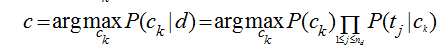

注意P(Ck|d)只是正比于后面那部分公式，完整的计算还有一个分母，但我们前面讨论了，对每个类别而已分母都是一样的，于是在我们只需要计算分子就能够进行分类了。实际的计算过程中，多个概率值P(tj|ck)的连乘很容易下溢出为0，因此转化为对数计算，连乘就变成了累加：

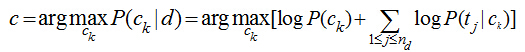

我们只需要从训练数据集中，计算每一个类别的出现概率P(ck)和每一个类别中各个特征词项的概率P(tj|ck)，而这些概率值的计算都采用最大似然估计，说到底*就是统计每个词在各个类别中出现的次数和各个类别的文档的数目*：

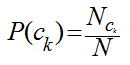
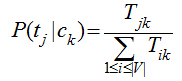

## 二、3种贝叶斯模型

### 1、高斯分布朴素贝叶斯

高斯分布就是正态分布

【用途】用于一般分类问题

使用自带的鸢尾花数据

In [1]:
from sklearn.naive_bayes import GaussianNB

In [4]:
import sklearn.datasets as datasets
iris = datasets.load_iris()
x_data = iris.data
y_target = iris.target

In [6]:
from sklearn.model_selection import train_test_split

X_train,x_test,y_train,y_test = train_test_split(x_data,y_target,test_size = 0.1)

In [7]:
#Naive Bayes 朴素贝叶斯
g_NB = GaussianNB()

g_NB.fit(X_train,y_train)

g_NB.score(x_test,y_test)

1.0

### 2、多项式分布朴素贝叶斯

多项式分布：

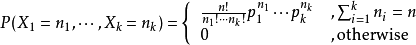

【用途】适用于文本数据（特征表示的是次数，例如某个词语的出现次数）

#### 例：延续上面，使用鸢尾花数据

In [9]:
from sklearn.naive_bayes import MultinomialNB

m_NB = MultinomialNB()

m_NB.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
m_NB.score(x_test,y_test)

1.0

### 3、伯努利分布朴素贝叶斯

伯努利分布：

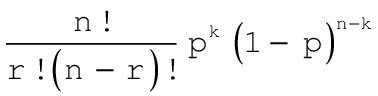

【用途】适用于伯努利分布，也适用于文本数据（此时特征表示的是是否出现，例如某个词语的出现为1，不出现为0）

绝大多数情况下表现不如多项式分布，但有的时候伯努利分布表现得要比多项式分布要好，尤其是对于小数量级的文本数据

#### 例：继续使用鸢尾花数据集

In [11]:
from sklearn.naive_bayes import BernoulliNB
b_NB = BernoulliNB()
b_NB.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [12]:
b_NB.score(x_test,y_test)

0.26666666666666666

## 三、文本分类实战

对短信进行二分类，数据为SMSSpamCollection

导包  
导入sklearn.feature_extraction.text.TfidfVectorizer用于转换字符串  
读取短信数据

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
import pandas as pd
sms = pd.read_table('../data/SMSSpamCollection',header=None)
display(sms.shape,sms.head())

(5572, 2)

0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [15]:
x_train = sms[1]
y_train = sms[0]

In [16]:
g_NB = GaussianNB()
# could not convert string to float: 'Rofl. Its true to its name'
g_NB.fit(x_train,y_train)

ValueError: could not convert string to float: 'Rofl. Its true to its name'

#### tf.fit_transform()

- 参数必须是字符串的一维数组（比如列表或者Series）
- 返回的是一个稀疏矩阵类型的对象，行数为样本数，列数为所有出现的单词统计个数。

这里输入data[1]是Series类型，返回的是一个5572x8713 sparse matrix 
其中5572是data[1]

In [ ]:
#Knn 声明对象，对象调用方法

In [23]:
#TfidfVectorizer 类----> 实例化

tf = TfidfVectorizer()

#对文本数据进行训练
tf.fit(x_train)

#对文本数据进行转换---->稀疏矩阵对象
# 5572x8713
# 5572 条短信
# 8713 个不同单词 8713列

#    columns ： Go until jurong point , crazy   Ok lar... Joking wif u oni...
#          0     1   1    1      1    1   1     0   0  0     0    0

#          1    0     0     0    0   0   0      1   1  1      1   1

X_train = tf.transform(x_train)


In [27]:
y_train

0        ham
1        ham
2       spam
3        ham
4        ham
5       spam
6        ham
7        ham
8       spam
9       spam
10       ham
11      spam
12      spam
13       ham
14       ham
15      spam
16       ham
17       ham
18       ham
19      spam
20       ham
21       ham
22       ham
23       ham
24       ham
25       ham
26       ham
27       ham
28       ham
29       ham
        ... 
5542     ham
5543     ham
5544     ham
5545     ham
5546     ham
5547    spam
5548     ham
5549     ham
5550     ham
5551     ham
5552     ham
5553     ham
5554     ham
5555     ham
5556     ham
5557     ham
5558     ham
5559     ham
5560     ham
5561     ham
5562     ham
5563     ham
5564     ham
5565     ham
5566    spam
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: 0, Length: 5572, dtype: object

训练数据

In [49]:
g_NB = GaussianNB()
# A sparse matrix was passed, but dense data is required.
# Use X.toarray() to convert to a dense numpy array.
# 【用途】用于一般分类问题
g_NB.fit(X_train.toarray(),y_train)

GaussianNB(priors=None)

In [38]:
X_train.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [33]:


#对短信数据进行预测
message = 'click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL'


#进行转化
x_test = tf.transform([message])
x_test

<1x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [34]:
g_NB.predict(x_test.toarray())

array(['spam'],
      dtype='<U4')

In [35]:
m_NB = MultinomialNB()

#【用途】适用于文本数据（特征表示的是次数，例如某个词语的出现次数）
m_NB.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
message = "Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed $1000 cash or $5000 prize!"
x_test = tf.transform([message])

m_NB.predict(x_test)

array(['spam'],
      dtype='<U4')

In [45]:
g_NB.predict(x_test.toarray())

array(['spam'],
      dtype='<U4')

预测数据，使用tf.transform(['xx'])进行转换生成测试数据

In [47]:
b_NB = BernoulliNB()
b_NB.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [48]:
b_NB.predict(x_test)

array(['spam'],
      dtype='<U4')

## 四、作业

#### 对email进行二分类，两种邮件分别在ham和spam目录下

In [51]:
ham = '../data/email/ham/'
spam = '../data/email/spam/'

In [53]:
def read_data(path,label):
    
    #声明列表
    msg = []
    
    for i in range(1,26):
        with open(path+str(i)+'.txt',errors= 'ignore') as file:
            data = file.read()
            
            msg.append([data,label])
    
    #msg 转换成DataFrame
    
    df_msg = pd.DataFrame(msg)
    
    return df_msg
    

In [55]:
ham_msg = read_data(ham,'ham')
spam_msg = read_data(spam,'spam')

In [56]:
#使用pandas方法将这两个DataFrame
email = pd.concat([ham_msg,spam_msg],ignore_index=True)
email.shape

(50, 2)

In [57]:
X_train = email[0]
y_train = email[1]

In [58]:
#对文本数据进行转化
tf = TfidfVectorizer()

#重新进行训练
tf.fit(X_train)

X_train_tf = tf.transform(X_train)

In [59]:
X_train_tf

<50x748 sparse matrix of type '<class 'numpy.float64'>'
	with 1669 stored elements in Compressed Sparse Row format>

In [60]:
m_Nb = MultinomialNB()
m_NB.fit(X_train_tf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
#进行预测
msg = '''Percocet 10/625 mg - $225!
Percocet, used to treat moderate to 
 EXPRESS Shipping, 100% Safe & Discreet & Private.
Buy Cheap'''

x_test = tf.transform([msg])

In [66]:
m_NB.predict(x_test)

array(['spam'],
      dtype='<U4')

In [69]:
msg = '''Jay Stepp commented on your status.
To see the comment thread, follow the link below:'''


x_test = tf.transform([msg])

In [70]:
m_NB.predict(x_test)

array(['ham'],
      dtype='<U4')